In [24]:
import sklearn
from sklearn import datasets
from sklearn import svm
from sklearn import metrics

In [25]:
from sklearn import preprocessing

In [26]:
# read CSV

import pandas as pd
df = pd.read_csv('./data/processed/allSVD.csv') 
print(df)

         Name         Type Tone Syllab    Jitter   Shimmer        HNR  \
0     743-u_n      healthy    n      u  1.164692  0.042058  24.772758   
1      56-i_n      healthy    n      i  0.155393  0.011061  26.922863   
2      39-a_l      healthy    l      a  0.224576  0.027684  27.151732   
3      29-a_l      healthy    l      a  0.498826  0.038859  20.022510   
4      46-i_n      healthy    n      i  0.532008  0.023150  22.705093   
...       ...          ...  ...    ...       ...       ...        ...   
7805  151-a_l  psychogenic    l      a  0.100698  0.010602  32.236174   
7806  366-u_n  psychogenic    n      u  0.201356  0.015767  31.531414   
7807  741-a_h  psychogenic    h      a  0.281613  0.026882  28.802297   
7808  366-u_l  psychogenic    l      u  0.389981  0.039966  23.895287   
7809  151-a_n  psychogenic    n      a  0.448863  0.024517  23.677346   

         MFCC-0     MFCC-1    MFCC-2  ...  MFCC-2_d2  MFCC-3_d2  MFCC-4_d2  \
0     21.736319  17.458524  7.820948  ...   0

In [27]:
df = df.drop(["Name", "Tone", "Syllab"], axis=1)
df = df[df["Type"] != "my_data"]
df

,Type,Jitter,Shimmer,HNR,MFCC-0,MFCC-1,MFCC-2,MFCC-3,MFCC-4,MFCC-5,...,MFCC-2_d2,MFCC-3_d2,MFCC-4_d2,MFCC-5_d2,MFCC-6_d2,MFCC-7_d2,MFCC-8_d2,MFCC-9_d2,MFCC-10_d2,MFCC-11_d2
0,healthy,1.164692,0.042058,24.772758,21.736319,17.458524,7.820948,3.013962,-0.112737,-1.432067,...,0.702141,0.270776,-0.009505,-0.128288,-0.186863,-0.080942,-0.100158,-0.020964,-0.034327,-0.045887
1,healthy,0.155393,0.011061,26.922863,23.644426,10.189441,4.770982,5.767449,1.589007,-0.705619,...,0.430543,0.518259,0.143927,-0.062734,0.127002,0.049976,-0.086409,0.016862,-0.080224,0.008735
2,healthy,0.224576,0.027684,27.151732,22.485759,17.417019,2.881103,-1.048527,-3.289772,-3.634941,...,0.264445,-0.091457,-0.292316,-0.328552,0.389849,0.009098,-0.191274,0.004799,-0.089539,-0.059719
3,healthy,0.498826,0.038859,20.022510,22.026267,15.125506,0.457665,-1.227691,-4.545792,-3.290087,...,0.047697,-0.107558,-0.409835,-0.297088,0.062504,0.123028,0.112664,0.175903,-0.137256,0.002436
4,healthy,0.532008,0.023150,22.705093,22.937200,8.484145,6.262272,6.895974,2.157817,-2.048918,...,0.562402,0.618542,0.195190,-0.183320,0.034640,0.149443,-0.214998,-0.022542,-0.047958,-0.059465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7805,psychogenic,0.100698,0.010602,32.236174,23.574362,15.892063,-2.114620,-4.102555,-1.148606,1.280938,...,-0.179323,-0.369967,-0.108087,0.108928,0.135450,0.083520,-0.140160,-0.111718,-0.050962,0.014016
7806,psychogenic,0.201356,0.015767,31.531414,22.511361,19.340193,8.954125,1.877514,-1.738897,-1.887560,...,0.790288,0.167677,-0.153999,-0.169101,-0.167884,0.034443,0.004447,0.011665,-0.033949,-0.111250
7807,psychogenic,0.281613,0.026882,28.802297,24.383547,15.528880,1.116797,-2.067196,-1.588425,0.926335,...,0.104059,-0.186318,-0.146550,0.081214,0.197146,0.141567,-0.099794,-0.178773,-0.165446,-0.054257
7808,psychogenic,0.389981,0.039966,23.895287,20.848472,14.195569,5.796031,3.136148,1.123970,0.395815,...,0.518428,0.280540,0.100661,0.036428,-0.025210,0.028554,0.010087,0.016879,0.001489,-0.045411


In [28]:
df = df.dropna()
df

,Type,Jitter,Shimmer,HNR,MFCC-0,MFCC-1,MFCC-2,MFCC-3,MFCC-4,MFCC-5,...,MFCC-2_d2,MFCC-3_d2,MFCC-4_d2,MFCC-5_d2,MFCC-6_d2,MFCC-7_d2,MFCC-8_d2,MFCC-9_d2,MFCC-10_d2,MFCC-11_d2
0,healthy,1.164692,0.042058,24.772758,21.736319,17.458524,7.820948,3.013962,-0.112737,-1.432067,...,0.702141,0.270776,-0.009505,-0.128288,-0.186863,-0.080942,-0.100158,-0.020964,-0.034327,-0.045887
1,healthy,0.155393,0.011061,26.922863,23.644426,10.189441,4.770982,5.767449,1.589007,-0.705619,...,0.430543,0.518259,0.143927,-0.062734,0.127002,0.049976,-0.086409,0.016862,-0.080224,0.008735
2,healthy,0.224576,0.027684,27.151732,22.485759,17.417019,2.881103,-1.048527,-3.289772,-3.634941,...,0.264445,-0.091457,-0.292316,-0.328552,0.389849,0.009098,-0.191274,0.004799,-0.089539,-0.059719
3,healthy,0.498826,0.038859,20.022510,22.026267,15.125506,0.457665,-1.227691,-4.545792,-3.290087,...,0.047697,-0.107558,-0.409835,-0.297088,0.062504,0.123028,0.112664,0.175903,-0.137256,0.002436
4,healthy,0.532008,0.023150,22.705093,22.937200,8.484145,6.262272,6.895974,2.157817,-2.048918,...,0.562402,0.618542,0.195190,-0.183320,0.034640,0.149443,-0.214998,-0.022542,-0.047958,-0.059465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7805,psychogenic,0.100698,0.010602,32.236174,23.574362,15.892063,-2.114620,-4.102555,-1.148606,1.280938,...,-0.179323,-0.369967,-0.108087,0.108928,0.135450,0.083520,-0.140160,-0.111718,-0.050962,0.014016
7806,psychogenic,0.201356,0.015767,31.531414,22.511361,19.340193,8.954125,1.877514,-1.738897,-1.887560,...,0.790288,0.167677,-0.153999,-0.169101,-0.167884,0.034443,0.004447,0.011665,-0.033949,-0.111250
7807,psychogenic,0.281613,0.026882,28.802297,24.383547,15.528880,1.116797,-2.067196,-1.588425,0.926335,...,0.104059,-0.186318,-0.146550,0.081214,0.197146,0.141567,-0.099794,-0.178773,-0.165446,-0.054257
7808,psychogenic,0.389981,0.039966,23.895287,20.848472,14.195569,5.796031,3.136148,1.123970,0.395815,...,0.518428,0.280540,0.100661,0.036428,-0.025210,0.028554,0.010087,0.016879,0.001489,-0.045411


In [29]:
# Create a label encoder object 
le = preprocessing.LabelEncoder()

# Fit the encoder object (le) to a pandas field with categorical data
le.fit(df['Type'])

# Display labels
target_names = list(le.classes_)
print(target_names)

# Apply the label encoder object to a pandas column
dys_target = le.transform(df['Type']) 
print(dys_target)

['functional', 'healthy', 'hyperfunctional', 'organic', 'psychogenic']
[1 1 1 ... 4 4 4]


In [30]:
dys_data = df.drop(columns="Type").to_numpy()
dys_data

array([[ 1.16469189e+00,  4.20582023e-02,  2.47727582e+01, ...,
        -2.09642153e-02, -3.43266953e-02, -4.58868171e-02],
       [ 1.55393233e-01,  1.10610539e-02,  2.69228625e+01, ...,
         1.68624838e-02, -8.02244829e-02,  8.73499195e-03],
       [ 2.24575675e-01,  2.76841952e-02,  2.71517319e+01, ...,
         4.79900276e-03, -8.95387159e-02, -5.97190317e-02],
       ...,
       [ 2.81612943e-01,  2.68821093e-02,  2.88022972e+01, ...,
        -1.78773138e-01, -1.65446490e-01, -5.42571710e-02],
       [ 3.89981061e-01,  3.99658038e-02,  2.38952866e+01, ...,
         1.68786166e-02,  1.48940394e-03, -4.54111531e-02],
       [ 4.48863314e-01,  2.45174528e-02,  2.36773463e+01, ...,
        -1.99717098e-02, -5.90851406e-02, -4.02867081e-02]])

In [31]:
x = dys_data
y = dys_target

In [32]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2)

In [39]:
clf = svm.SVC(kernel="linear", )
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print("Linear Accuracy:", acc)

Linear Accuracy: 0.40897435897435896


In [40]:
import numpy as np
np.where(np.isnan(x))

(array([], dtype=int64), array([], dtype=int64))

In [41]:
# Get support vector indices
support_vector_indices = clf.support_
print(support_vector_indices)

[   2   19   22 ... 6203 6216 6230]


In [42]:
# Get number of support vectors per class
support_vectors_per_class = clf.n_support_
print(support_vectors_per_class)


[ 794 1608 1521  716  676]


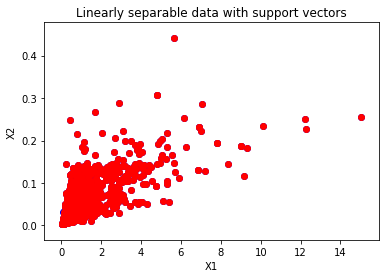

In [48]:
import matplotlib.pyplot as plt

# Get support vectors themselves
support_vectors = clf.support_vectors_

# Visualize support vectors
plt.scatter(x_train[:,0], x_train[:,1], color='blue')
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1 Jitter')
plt.ylabel('X2 Shimmer')
plt.show()